In [271]:
import numpy as np
import pandas as pd
from numpy import random as rd
from pandas import DataFrame as df
import graphviz as gr
import statsmodels.formula.api as smf

<h5> 1. Simulate a DGP where the outcome only depends on a randomly assigned treatment and observed covariates</h5>

<h6>Generating randomly assigned treatment and observed covariates</h6>

In [278]:
N=100
covar_A = rd.rand(N)*100
covar_B = rd.rand(N)*100
covar_C = rd.rand(N)*100
treatment = rd.randint(2,size=N)
print(covar_A)
print("\n")
print(covar_B)
print("\n")
print(covar_C)
print("\n")
print(treatment)

[3.48611730e+01 9.93314288e+01 2.25434099e+00 6.46621986e+01
 8.45254050e+01 1.87584794e+01 9.93356580e+01 1.75116183e+01
 3.39172883e+00 6.32336700e+01 4.38145943e+01 8.59782639e+01
 7.15787361e+01 8.96998211e+00 4.06791186e+01 1.51830999e+01
 8.70053235e+01 6.52469098e+01 6.38532700e+01 7.25411241e+01
 9.27108919e+01 7.01179350e+01 8.27772334e+01 6.89503785e+01
 7.70359180e+01 6.66222180e+01 8.35956710e+01 4.35976858e+01
 1.72120682e+01 9.78601494e+01 9.24759260e+01 7.39363060e+01
 3.59222632e+01 8.80270141e+01 7.25854463e+00 8.61869624e+01
 3.77954168e+01 2.30428049e+01 1.47410827e+01 1.63297596e-01
 8.77636154e+01 9.00256767e+01 9.93604304e+01 3.83642151e+01
 5.95049911e+01 9.59330910e+01 3.46262152e+01 7.46117517e+01
 4.02323537e+01 5.79614547e+00 2.03395188e+01 6.85580145e+01
 6.76528585e+01 2.64678207e+01 1.34375135e+01 2.96407138e+01
 3.37502294e+01 2.59480227e+01 6.34765801e+00 4.12371292e+01
 4.71957952e+01 1.21382643e+01 1.16707896e+01 8.24421452e+01
 1.41718186e+01 8.149265

In [279]:
Y=0.5*treatment +0.3*covar_A+0.4*covar_B+0.2*covar_C
Y

array([17.60412402, 72.32513877, 34.02049263, 46.85855907, 55.7048925 ,
       12.96220756, 63.01932102,  9.43456153, 58.44025681, 61.43865624,
       43.81150716, 40.60305774, 51.39542355, 23.33570153, 44.07847505,
       39.83325448, 63.54519436, 34.83025319, 46.19216614, 60.61592283,
       69.89764762, 57.50917412, 55.72609239, 64.37715138, 43.48503738,
       47.64683084, 62.36440985, 43.1141932 , 55.21009371, 64.26774177,
       57.07603766, 34.43739517, 38.24786195, 66.32904002, 28.8826399 ,
       70.19893601, 19.46091498, 13.3100022 , 58.66804605, 31.80183938,
       54.13677217, 68.72746931, 36.8507352 , 22.94116681, 59.0623605 ,
       73.86913071, 51.09965157, 36.04071025, 27.69133638, 34.95841014,
       53.47351453, 71.31924362, 53.45894027, 43.04897049, 36.58388966,
       39.91708962, 23.99240219, 41.76063613, 37.17343305, 32.18043666,
       46.70565906, 44.02727688, 34.15487256, 74.24018863, 31.5036538 ,
       77.92721098, 44.34196501, 44.93471224, 33.27564845, 29.79

In [280]:
#create a dataframe
data = df({'Y':Y,'Treatment':treatment,'covariance_A':covar_A,'covariance_B':covar_B,'covariance_C':covar_C})
data.head

<bound method NDFrame.head of             Y  Treatment  covariance_A  covariance_B  covariance_C
0   17.604124          1     34.861173     10.026936     13.174989
1   72.325139          0     99.331429     92.168698     28.291154
2   34.020493          0      2.254341     44.772568     77.175815
3   46.858559          0     64.662199     35.382673     66.534152
4   55.704892          1     84.525405     55.069375     39.097605
..        ...        ...           ...           ...           ...
95  47.684740          0     84.361492     26.688992     58.503478
96  41.439142          0     86.343563     23.912400     29.855566
97  58.276321          0     69.630604     48.766349     89.403002
98  44.609157          1     84.101787     13.747550     66.898006
99  41.704309          1     96.247800      5.996191     49.657461

[100 rows x 5 columns]>

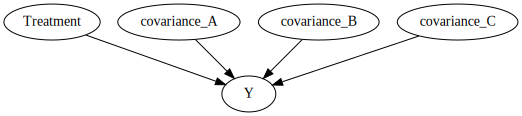

In [281]:
g = gr.Digraph()
g.edge("Treatment", "Y")
g.edge("covariance_A", "Y")
g.edge("covariance_B", "Y")
g.edge("covariance_C", "Y")
g

In [282]:
#control for covariates
model = smf.ols('Y~Treatment+covar_A+covar_B+covar_C',data = data).fit()

In [283]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.530e+30
Date:                Thu, 14 Apr 2022   Prob (F-statistic):               0.00
Time:                        14:04:07   Log-Likelihood:                 2943.2
No. Observations:                 100   AIC:                            -5876.
Df Residuals:                      95   BIC:                            -5863.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.842e-14   1.41e-14      2.012      0.0

<h5>Bias = 0, RMSE = 0</h5>

In [284]:
#do not control for variates
model = smf.ols('Y~Treatment',data = data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     2.896
Date:                Thu, 14 Apr 2022   Prob (F-statistic):             0.0920
Time:                        14:04:10   Log-Likelihood:                -413.95
No. Observations:                 100   AIC:                             831.9
Df Residuals:                      98   BIC:                             837.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     47.7309      1.981     24.098      0.0

In [311]:
RMSE = np.sqrt((0.5+5.3294)**2/1)
#print('RMSE = {}'.format(RMSE))
bias = 5.8294
#print('bias = {}'.format(bias))

<h5>Bias =0.2146, RMSE=0.2146, treatment effect =0.5 </h5>

In [287]:
# when N=1000
N=1000
covar_A1 = rd.rand(N)*100
covar_B1 = rd.rand(N)*100
covar_C1 = rd.rand(N)*100
treatment_1 = rd.randint(2,size=N)
Y1=0.5*treatment_1 +0.3*covar_A1+0.4*covar_B1+0.2*covar_C1
data1 = df({'Y1':Y1,'Treatment_1':treatment_1,'covariance_A1':covar_A1,'covariance_B1':covar_B1,'covariance_C1':covar_C1})

In [288]:
#don't control for variates
model = smf.ols('Y1~Treatment_1+covar_A1+covar_B1+covar_C1',data = data1).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     Y1   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.030e+31
Date:                Thu, 14 Apr 2022   Prob (F-statistic):               0.00
Time:                        14:05:42   Log-Likelihood:                 28785.
No. Observations:                1000   AIC:                        -5.756e+04
Df Residuals:                     995   BIC:                        -5.754e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    9.992e-15      8e-15      1.249      

<h5>bias = 0, RMSE = 0, treatment effect = 0.5</h5>

In [289]:
#control for variates
model = smf.ols('Y1~Treatment_1',data = data1).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     Y1   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.01565
Date:                Thu, 14 Apr 2022   Prob (F-statistic):              0.900
Time:                        14:05:45   Log-Likelihood:                -4161.5
No. Observations:                1000   AIC:                             8327.
Df Residuals:                     998   BIC:                             8337.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      44.9519      0.687     65.445      

In [302]:
bias = 0.123-0.5
#print('bias = {}'.format(bias))
RMSE = np.sqrt((0.123-0.5)**2/1)
#print('RMSE = {}'.format(RMSE))

<h5>bias = -0.377, RMSE = 0.377, treatment effect = 0.5 </h5>


In [291]:
data1.to_csv('Q1.csv',index=False)

<h5>An example of a real-life situation</h5>

Students are randomly assigned to take extra tutorials in order to improve study performance. To effectively know whether taking extra tutorials improves study performance, we need to control the size of the classroom which is a covariate in the model.


<h5>2. Simulate a DGP with a confounder</h5>

<h6>Generating randomly assigned treatment and a confounder</h6>

In [292]:
N=100
confounder = rd.rand(N)*100
T = 0.3*confounder +rd.rand(N)*100
Y = 0.4*T +0.3*confounder

In [293]:
data2 = df({'Y':Y,'T':T,'confonder':confounder})
data2.head

<bound method NDFrame.head of             Y           T  confonder
0   35.673119   47.018942  56.218472
1   44.222662   43.722974  89.111576
2   47.769711   90.841767  38.110014
3   64.683050   92.866797  91.787769
4   39.978428   45.632253  72.418421
..        ...         ...        ...
95  28.329256   37.412947  44.546924
96  53.198466   61.356493  95.519561
97  69.445699  116.677735  75.915349
98   8.415185   17.096077   5.255846
99  37.913530   90.260014   6.031747

[100 rows x 3 columns]>

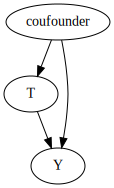

In [307]:
g = gr.Digraph()

g.edge("coufounder", "T")

g.edge("T", "Y")
g.edge("coufounder", "Y")
g


In [294]:
#control confounders
model = smf.ols('Y~T+confounder',data = data2).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.191e+31
Date:                Thu, 14 Apr 2022   Prob (F-statistic):               0.00
Time:                        14:08:54   Log-Likelihood:                 2958.6
No. Observations:                 100   AIC:                            -5911.
Df Residuals:                      97   BIC:                            -5903.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.217e-15   9.39e-15      0.662      0.5

<h5>Bias =0, RMSE=0, treatment effect =0.4 </h5>

In [295]:
# don't control confounders
model = smf.ols('Y~T',data = data2).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     284.3
Date:                Thu, 14 Apr 2022   Prob (F-statistic):           9.95e-31
Time:                        14:08:56   Log-Likelihood:                -357.00
No. Observations:                 100   AIC:                             718.0
Df Residuals:                      98   BIC:                             723.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.5018      2.139      4.443      0.0

<h5>Bias = 0.0953, RMSE = 0.0953</h5>

In [156]:
#sample size = 1000
N=1000
confounder = rd.rand(N)*100
T = 0.3*confounder +rd.rand(N)*100
Y = 0.4*T +0.3*confounder

In [157]:
data2 = df({'Y':Y,'T':T,'confonder':confounder})
data2.head

<bound method NDFrame.head of              Y           T  confonder
0    27.787988   66.184023   4.381262
1    62.493030   83.041584  97.587987
2    46.619272   75.135406  55.217034
3    56.722001  111.096940  40.944084
4    49.324202   63.907982  79.203365
..         ...         ...        ...
995  16.890886   29.145496  17.442293
996  28.582481   36.788675  46.223368
997  34.400694   52.705663  44.394764
998  24.556417   51.358283  13.377013
999  21.065356   37.562390  20.134668

[1000 rows x 3 columns]>

In [158]:
#control confounders
model = smf.ols('Y~T+confounder',data = data2).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.616e+31
Date:                Thu, 14 Apr 2022   Prob (F-statistic):               0.00
Time:                        13:55:52   Log-Likelihood:                 29486.
No. Observations:                1000   AIC:                        -5.897e+04
Df Residuals:                     997   BIC:                        -5.895e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.665e-14   3.16e-15      5.273      0.0

<h5>Bias = 0, RMSE =0, treatment effect= 0.4 </h5>

In [159]:
# don't control confounders
model = smf.ols('Y~T',data = data2).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     3003.
Date:                Thu, 14 Apr 2022   Prob (F-statistic):          3.40e-303
Time:                        13:55:54   Log-Likelihood:                -3535.8
No. Observations:                1000   AIC:                             7076.
Df Residuals:                     998   BIC:                             7085.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.7403      0.620     15.710      0.0

In [160]:
data2.to_csv('Q2.csv',index = False)

<h5>bias = 0.0726, RMSE = 0.0726</h5>

<h5>An example of a real-life situation</h5>
suppose we are studying how the air quality index affects health. Except for air quality index, inside smoking is another confounder that affects health to some extent. Therefore, we need to think of it as well.

<h5>3. Simulate a DGP with selection bias into the treatment</h5>

In [161]:
N=100
T = rd.rand(N)*100
S = 0.3*T+rd.rand(N)*100
Y = 0.5*S

In [162]:
data = df({'T':T, 'S':S, 'Y': Y})
data.head

<bound method NDFrame.head of             T           S          Y
0   12.467333   20.262268  10.131134
1   27.348834   71.090284  35.545142
2    5.347499   46.026678  23.013339
3   85.013267   88.523454  44.261727
4   59.599851  113.629484  56.814742
..        ...         ...        ...
95  99.055203  128.560480  64.280240
96  17.344796   88.404045  44.202022
97   0.440283   77.146803  38.573401
98  77.539009  119.137729  59.568865
99  75.957427   45.569040  22.784520

[100 rows x 3 columns]>

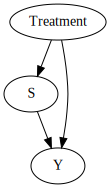

In [313]:
g = gr.Digraph()

g.edge("Treatment", "S")

g.edge("S", "Y")
g.edge("Treatment", "Y")
g

In [310]:
#control for the variable in between the path from cause to effec
model = smf.ols('Y~T+S',data = data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.7516
Date:                Thu, 14 Apr 2022   Prob (F-statistic):              0.474
Time:                        14:18:40   Log-Likelihood:                -414.63
No. Observations:                 100   AIC:                             835.3
Df Residuals:                      97   BIC:                             843.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     44.1884      5.448      8.111      0.0

<h5>bias = 0.5365, RMSE = 0.5365</h5>

In [127]:
#don't control for the variable in between the path from cause to effect
model = smf.ols('Y~T',data = data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     3.236
Date:                Thu, 14 Apr 2022   Prob (F-statistic):             0.0751
Time:                        13:44:02   Log-Likelihood:                -416.62
No. Observations:                 100   AIC:                             837.2
Df Residuals:                      98   BIC:                             842.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     26.3909      2.958      8.921      0.0

<h5>bias = -0.4039, RMSE = 0.4039</h5>

In [128]:
#N = 1000
N=1000
T = rd.rand(N)*100
S = 0.3*T+rd.rand(N)*100
Y = 0.5*S

In [129]:
data = df({'T':T, 'S':S, 'Y': Y})
data.head

<bound method NDFrame.head of              T           S          Y
0    61.450624  104.676105  52.338052
1    94.162078   79.433578  39.716789
2    99.735502   86.354644  43.177322
3    91.515387  121.873306  60.936653
4    84.817076   68.824880  34.412440
..         ...         ...        ...
995  23.087277   77.303264  38.651632
996  39.226513   99.515709  49.757854
997   3.390577   92.952634  46.476317
998  13.833466   75.882997  37.941499
999  38.342074   24.186061  12.093031

[1000 rows x 3 columns]>

In [130]:
#control for the variable in between the path from cause to effec
model = smf.ols('Y~T+S',data = data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.320e+33
Date:                Thu, 14 Apr 2022   Prob (F-statistic):               0.00
Time:                        13:45:47   Log-Likelihood:                 30918.
No. Observations:                1000   AIC:                        -6.183e+04
Df Residuals:                     997   BIC:                        -6.181e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -9.215e-15   7.74e-16    -11.907      0.0

 <h5>bias = 0.4, RMSE = 0.4874 </h5>

In [131]:
#don't control for the variable in between the path from cause to effec
model = smf.ols('Y~T',data = data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     95.16
Date:                Thu, 14 Apr 2022   Prob (F-statistic):           1.55e-21
Time:                        13:45:48   Log-Likelihood:                -4062.5
No. Observations:                1000   AIC:                             8129.
Df Residuals:                     998   BIC:                             8139.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     25.4026      0.894     28.400      0.0

<h5>bias = 0.3596, RMSE = 0.3596, treatment effect = 0.5</h5>

In [314]:
data.to_csv('Q3.csv',index = False)

<h5>An example of a real-life situation</h5>
A simple example of selection bias in the treatment is that the doctor wants to study if the medicine is working. In this case, the doctor gives the medicine to patients they think the medicine will work. This behavior can be understood as selection bias because the doctor already assumed part of the patients will be better after taking the medicine.